In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
mock_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.2eq_CB16MILES_ChFall/mock_ER_snr100/'
models_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.2eq_CB16MILES_ChFall/'
phpars_to_fit=['mstar','mstar_form','agewr','agelgwr','agewm','agelgwm','agewmf','agelgwmf','zstarwr','zstarwm','zstarwmf','zstarlgwmf','zstarlgwr','zstarlgwm','Ag','Ai','mtoli','age10','age50','age90','dage_10_90', 'dage_25_75', 'dage_50_90', 'dage_10_50','dage_10_90n50']
n_par=np.size(phpars_to_fit)
n_mock=12500

In [3]:
file_pert=models_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_perterr_SNR100_001.fits'
file_models=models_dir+'sandage_varZ_v4.2eq.fits'
file_mock_dage1090n50=mock_dir+'mock_file_dage_10_90n50001.fits'
file_mock_dage1050n50=mock_dir+'mock_file_dage_10_50n50001.fits'
file_mock_dage5090n50=mock_dir+'mock_file_dage_50_90n50001.fits'
file_mock_age90=mock_dir+'mock_file_age90001.fits'
file_mock_age50=mock_dir+'mock_file_age50001.fits'
file_mock_Zr=mock_dir+'mock_file_zstarwr001.fits'
file_mock_ager=mock_dir+'mock_file_agewr001.fits'

file_par=models_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_001_physpar_wagef.fits'
file_idx=models_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_idx_001.fits'

save=True
snr='100'

In [4]:
hdul_dage1090n50=fits.open(file_mock_dage1090n50)
hdul_dage1050n50=fits.open(file_mock_dage1050n50)
hdul_dage5090n50=fits.open(file_mock_dage5090n50)


hdul_idx=fits.open(file_idx)
hdul_par=fits.open(file_par)
hdul_pert=fits.open(file_pert)
hdul_age90=fits.open(file_mock_age90)
hdul_models=fits.open(file_models)
hdul_age50=fits.open(file_mock_age50)
hdul_Zr=fits.open(file_mock_Zr)
hdul_ager=fits.open(file_mock_ager)

age10=hdul_par[1].data['age10'][0:n_mock]
age50=hdul_par[1].data['age50'][0:n_mock]
age90=hdul_par[1].data['age90'][0:n_mock]
age25=hdul_par[1].data['age25'][0:n_mock]
age75=hdul_par[1].data['age75'][0:n_mock]
Zr=hdul_par[1].data['LW_Z'][...,2]
ager=hdul_par[1].data['LW_AGE'][...,2]

N_burst=hdul_models[1].data['NBURST'][0:n_mock]
A_burst=hdul_models[1].data['ABURST'][0:n_mock]
Aburst_arr=np.reshape(A_burst, -1)


hdhg=hdul_idx[1].data['HdHg'][...,4] 
D4000n=hdul_idx[1].data['D4000n'][...,4]
mg2fe=hdul_idx[1].data['MG2FE'][...,4]

D4000n_err=hdul_pert[1].data['D4000N_ERR_SNR020']
hdhg_err=hdul_pert[1].data['HDHG_ERR_SNR020']
mg2fe_err=hdul_pert[1].data['MG2FE_ERR_SNR020']

In [5]:
np.shape(Zr)

(12500,)

In [6]:
np.size(hdul_par[1].data)

12500

In [7]:
age90_mock=hdul_age90[1].data['PARAM_MEDIAN']
age90_err=((hdul_age90[1].data['PARAM_P84'])-(hdul_age90[1].data['PARAM_P16']))/2.0

In [8]:
age50_mock=hdul_age50[1].data['PARAM_MEDIAN']
age50_err=((hdul_age50[1].data['PARAM_P84'])-(hdul_age50[1].data['PARAM_P16']))/2.0

In [9]:
Zr_mock=hdul_Zr[1].data['PARAM_MEDIAN']
Zr_err=((hdul_Zr[1].data['PARAM_P84'])-(hdul_Zr[1].data['PARAM_P16']))/2.0

In [10]:
ager_mock=hdul_ager[1].data['PARAM_MEDIAN']
ager_err=((hdul_ager[1].data['PARAM_P84'])-(hdul_ager[1].data['PARAM_P16']))/2.0

In [11]:
dage1090n50=(age10-age90)/age50
dage1050n50=(age10-age50)/age50
dage5090n50=(age50-age90)/age50

dage1090n50_mock=hdul_dage1090n50[1].data['PARAM_MEDIAN']
dage1090n50_err=(np.log10(hdul_dage1090n50[1].data['PARAM_P84'])-np.log10(hdul_dage1090n50[1].data['PARAM_P16']))/2.0
dage1050n50_mock=hdul_dage1050n50[1].data['PARAM_MEDIAN']
dage1050n50_err=(np.log10(hdul_dage1050n50[1].data['PARAM_P84'])-np.log10(hdul_dage1050n50[1].data['PARAM_P16']))/2.0
dage5090n50_mock=hdul_dage5090n50[1].data['PARAM_MEDIAN']
dage5090n50_err=(np.log10(hdul_dage5090n50[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50[1].data['PARAM_P16']))/2.0

<ipython-input-11-b85c26723fc8>:8: RuntimeWarning: divide by zero encountered in log10
  dage1050n50_err=(np.log10(hdul_dage1050n50[1].data['PARAM_P84'])-np.log10(hdul_dage1050n50[1].data['PARAM_P16']))/2.0
<ipython-input-11-b85c26723fc8>:10: RuntimeWarning: divide by zero encountered in log10
  dage5090n50_err=(np.log10(hdul_dage5090n50[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50[1].data['PARAM_P16']))/2.0
<ipython-input-11-b85c26723fc8>:10: RuntimeWarning: invalid value encountered in subtract
  dage5090n50_err=(np.log10(hdul_dage5090n50[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50[1].data['PARAM_P16']))/2.0


total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:93: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=N_bins, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


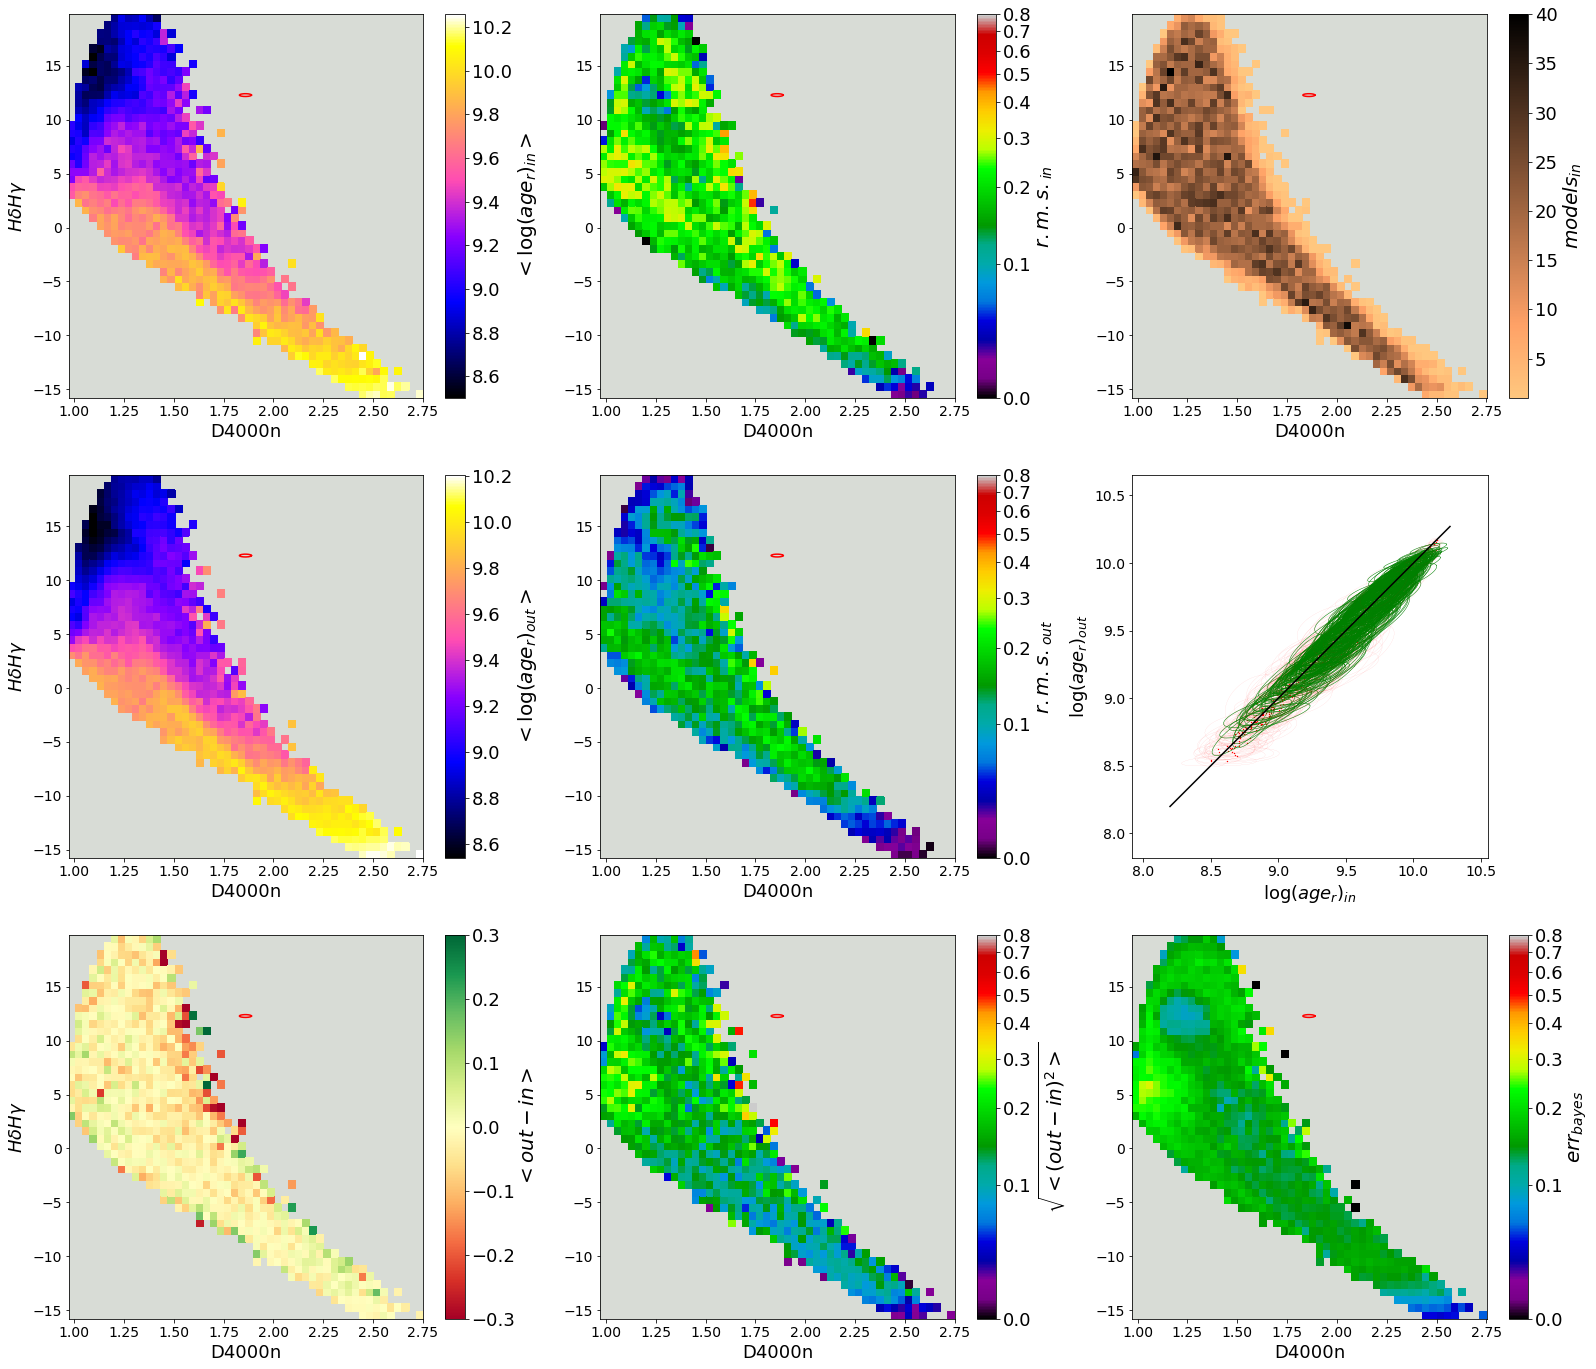

In [37]:
f_ager=f_plt.density_map_5p(D4000n, hdhg, np.log10(ager), (ager_mock), (ager_err),D4000n_err, hdhg_err,par_name=r'$\log(age_{r})$', x_label='D4000n', y_label=r'$H\delta H\gamma$', vmin=[None,0.0, -0.3, 0.0,0.0], vmax=[None,0.8, 0.3, 0.8,0.8], figsize=(27,24), s=1)

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:93: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=N_bins, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3963: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


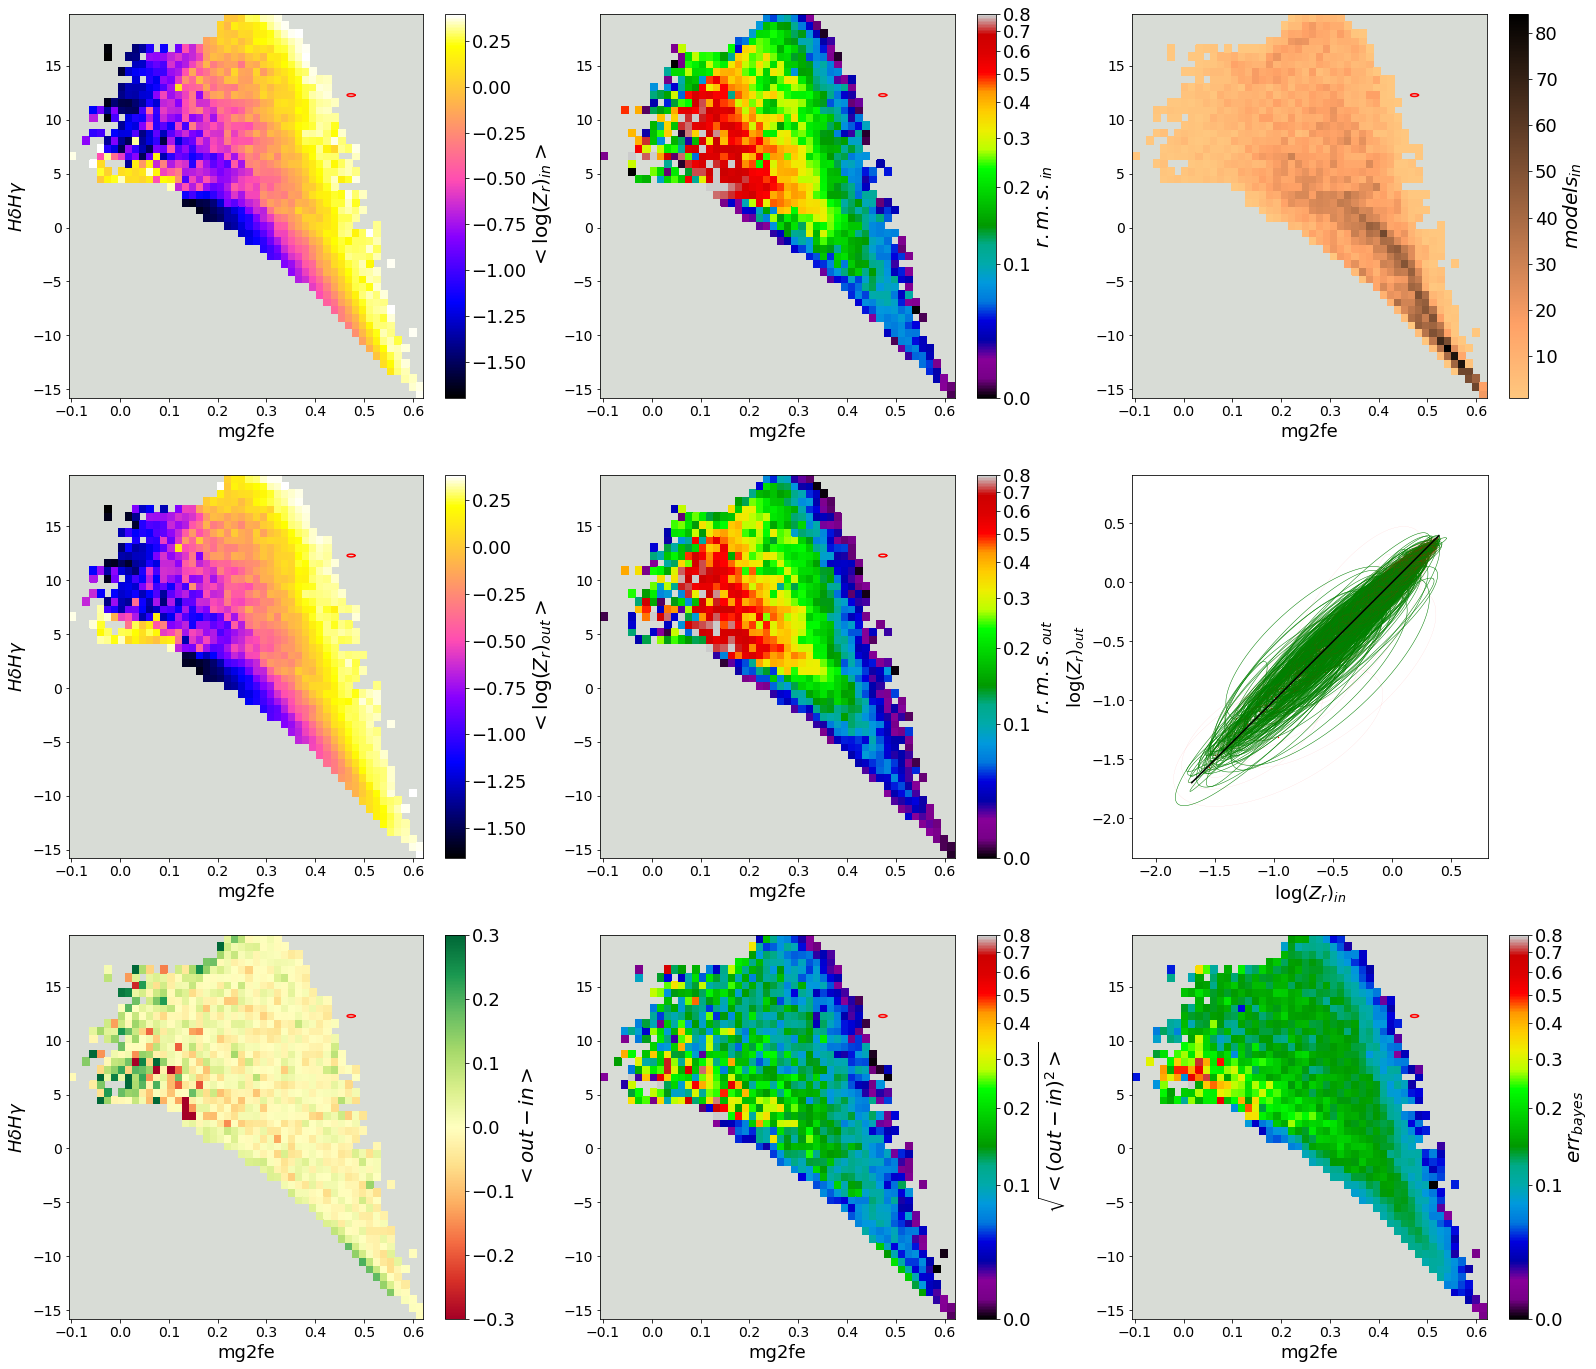

In [38]:
f_Zr=f_plt.density_map_5p(mg2fe, hdhg, Zr, (Zr_mock), (Zr_err),mg2fe_err,hdhg_err,par_name=r'$\log(Z_{r})$', x_label='mg2fe', y_label=r'$H\delta H\gamma$', vmin=[None,0.0, -0.3, 0.0,0.0], vmax=[None,0.8, 0.3, 0.8,0.8], figsize=(27,24), s=1)

In [14]:
age50_mock

array([9.57584  , 9.065465 , 9.255295 , ..., 9.077499 , 8.94987  ,
       9.5472145], dtype=float32)

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:93: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=N_bins, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


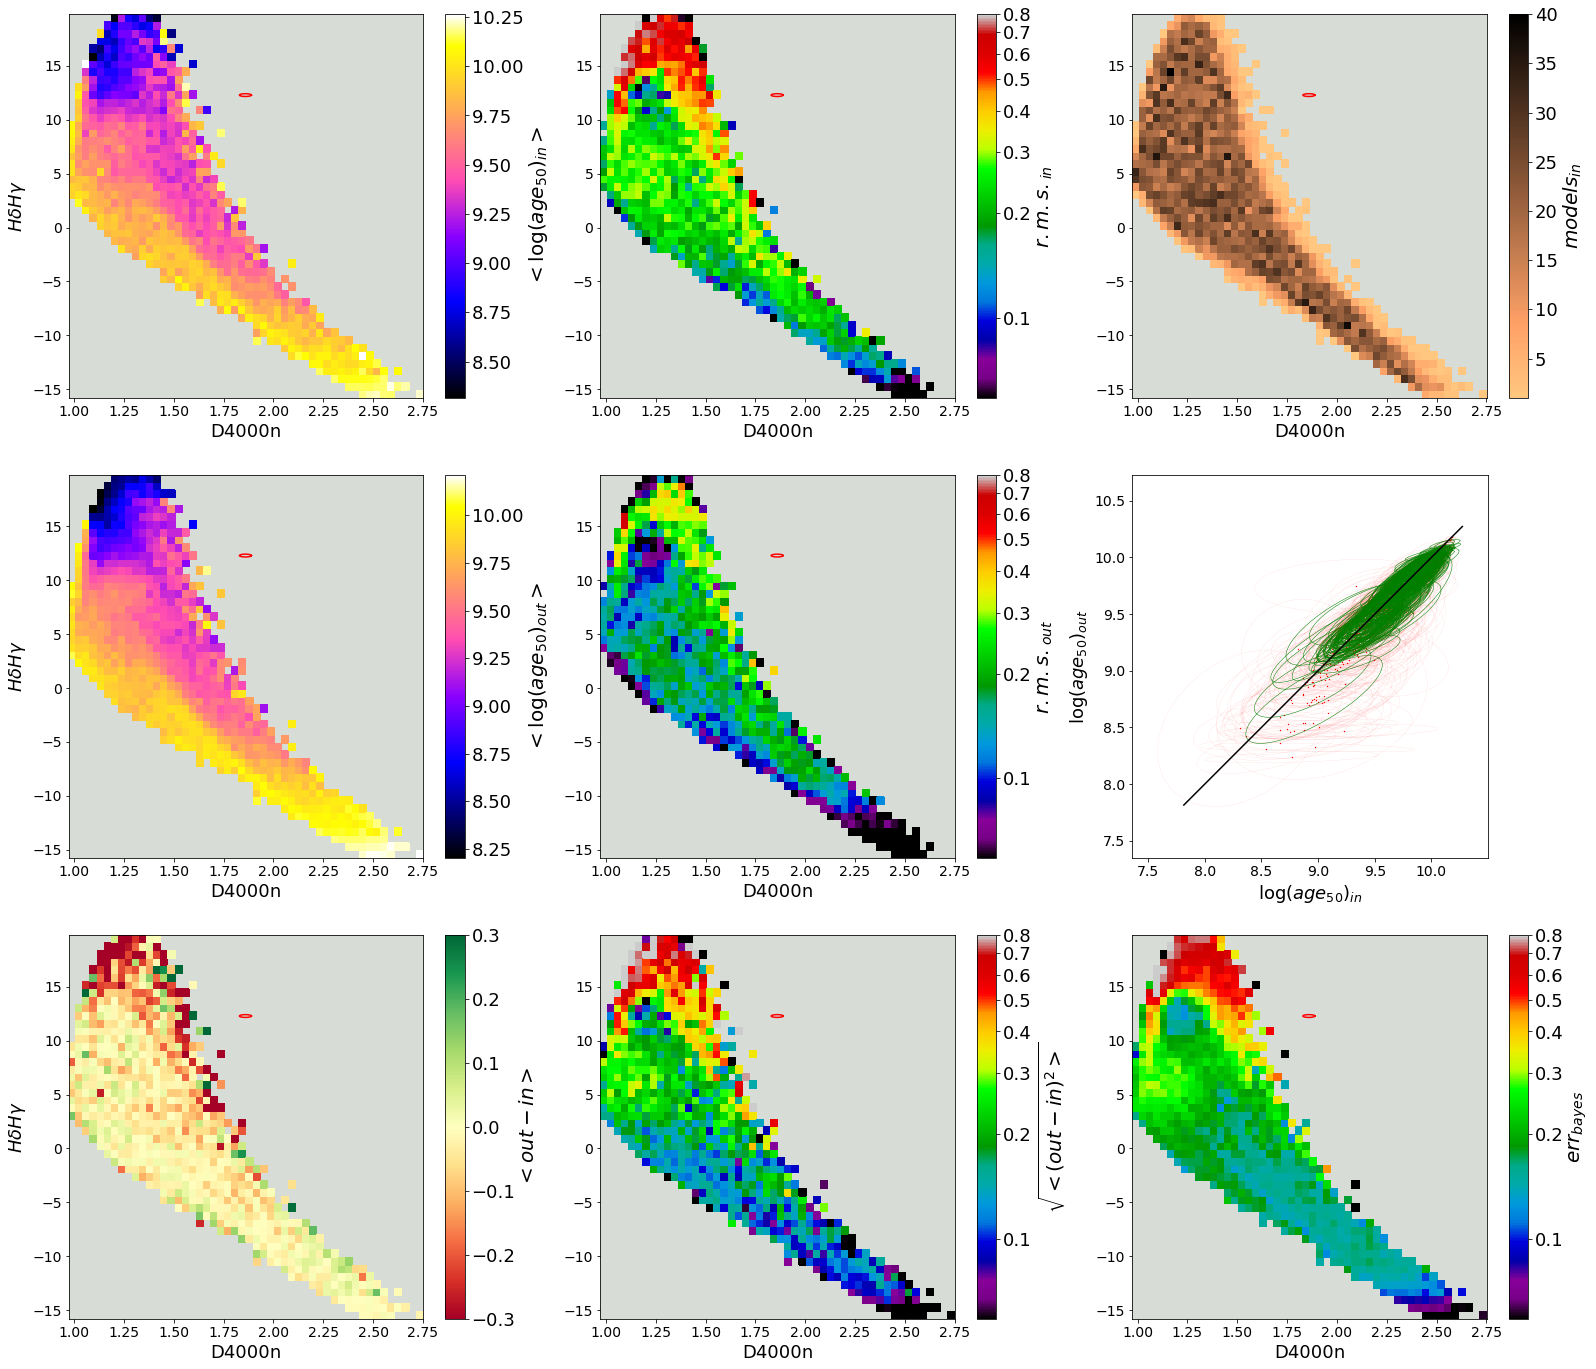

In [39]:
f_age50=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50), (age50_mock), (age50_err),D4000n_err, hdhg_err,par_name=r'$\log(age_{50})$', x_label='D4000n', y_label=r'$H\delta H\gamma$', vmin=[None,0.05, -0.3, 0.05,0.05], vmax=[None,0.8, 0.3, 0.8,0.8], figsize=(27,24), s=1)

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:93: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=N_bins, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3963: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


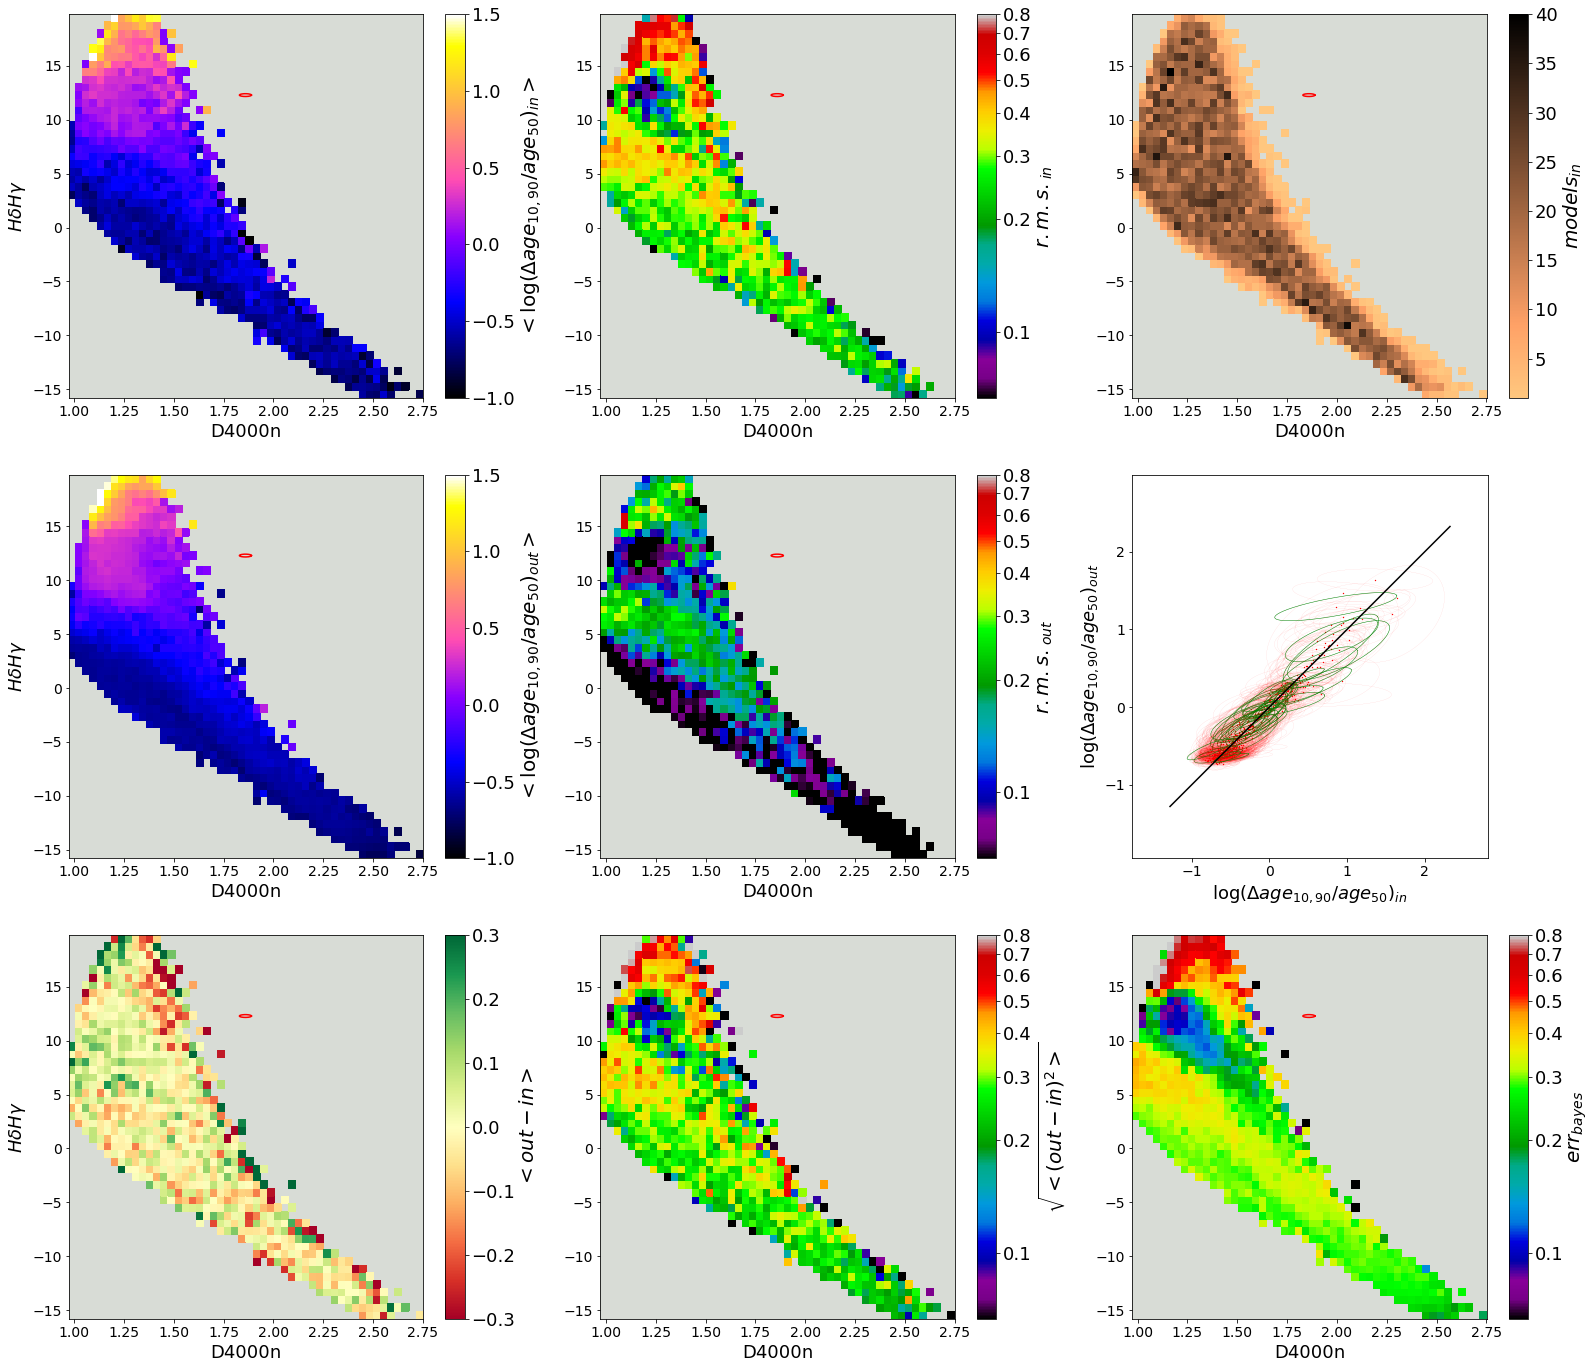

In [40]:
f_1090n50=f_plt.density_map_5p(D4000n, hdhg, np.log10(dage1090n50), np.log10(dage1090n50_mock), (dage1090n50_err),D4000n_err, hdhg_err,par_name=r'$\log(\Delta age_{10,90}/age_{50})$', x_label='D4000n', y_label=r'$H\delta H\gamma$', vmin=[-1.0,0.06, -0.3, 0.06,0.06], vmax=[1.5,0.8, 0.3, 0.8,0.8], figsize=(27,24), s=1)

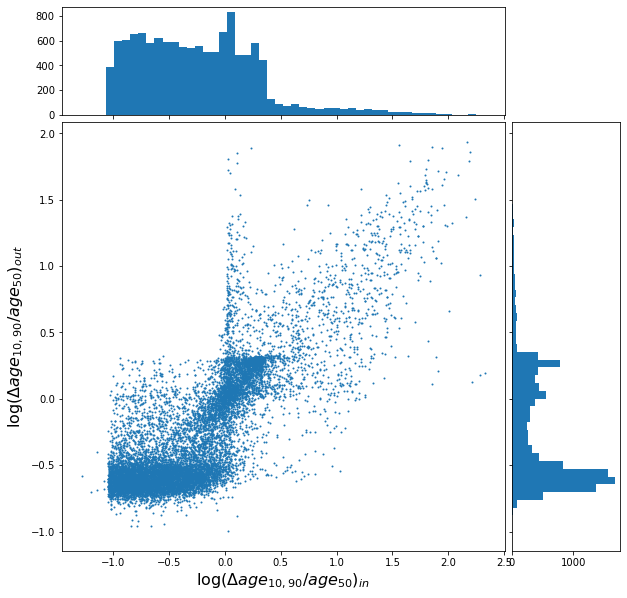

In [17]:
scat_hist_d1090n50=f_plt.scatter_hist(np.log10(dage1090n50), np.log10(dage1090n50_mock), name_par=r'$\log(\Delta age_{10,90}/age_{50})$')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:93: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=N_bins, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3963: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


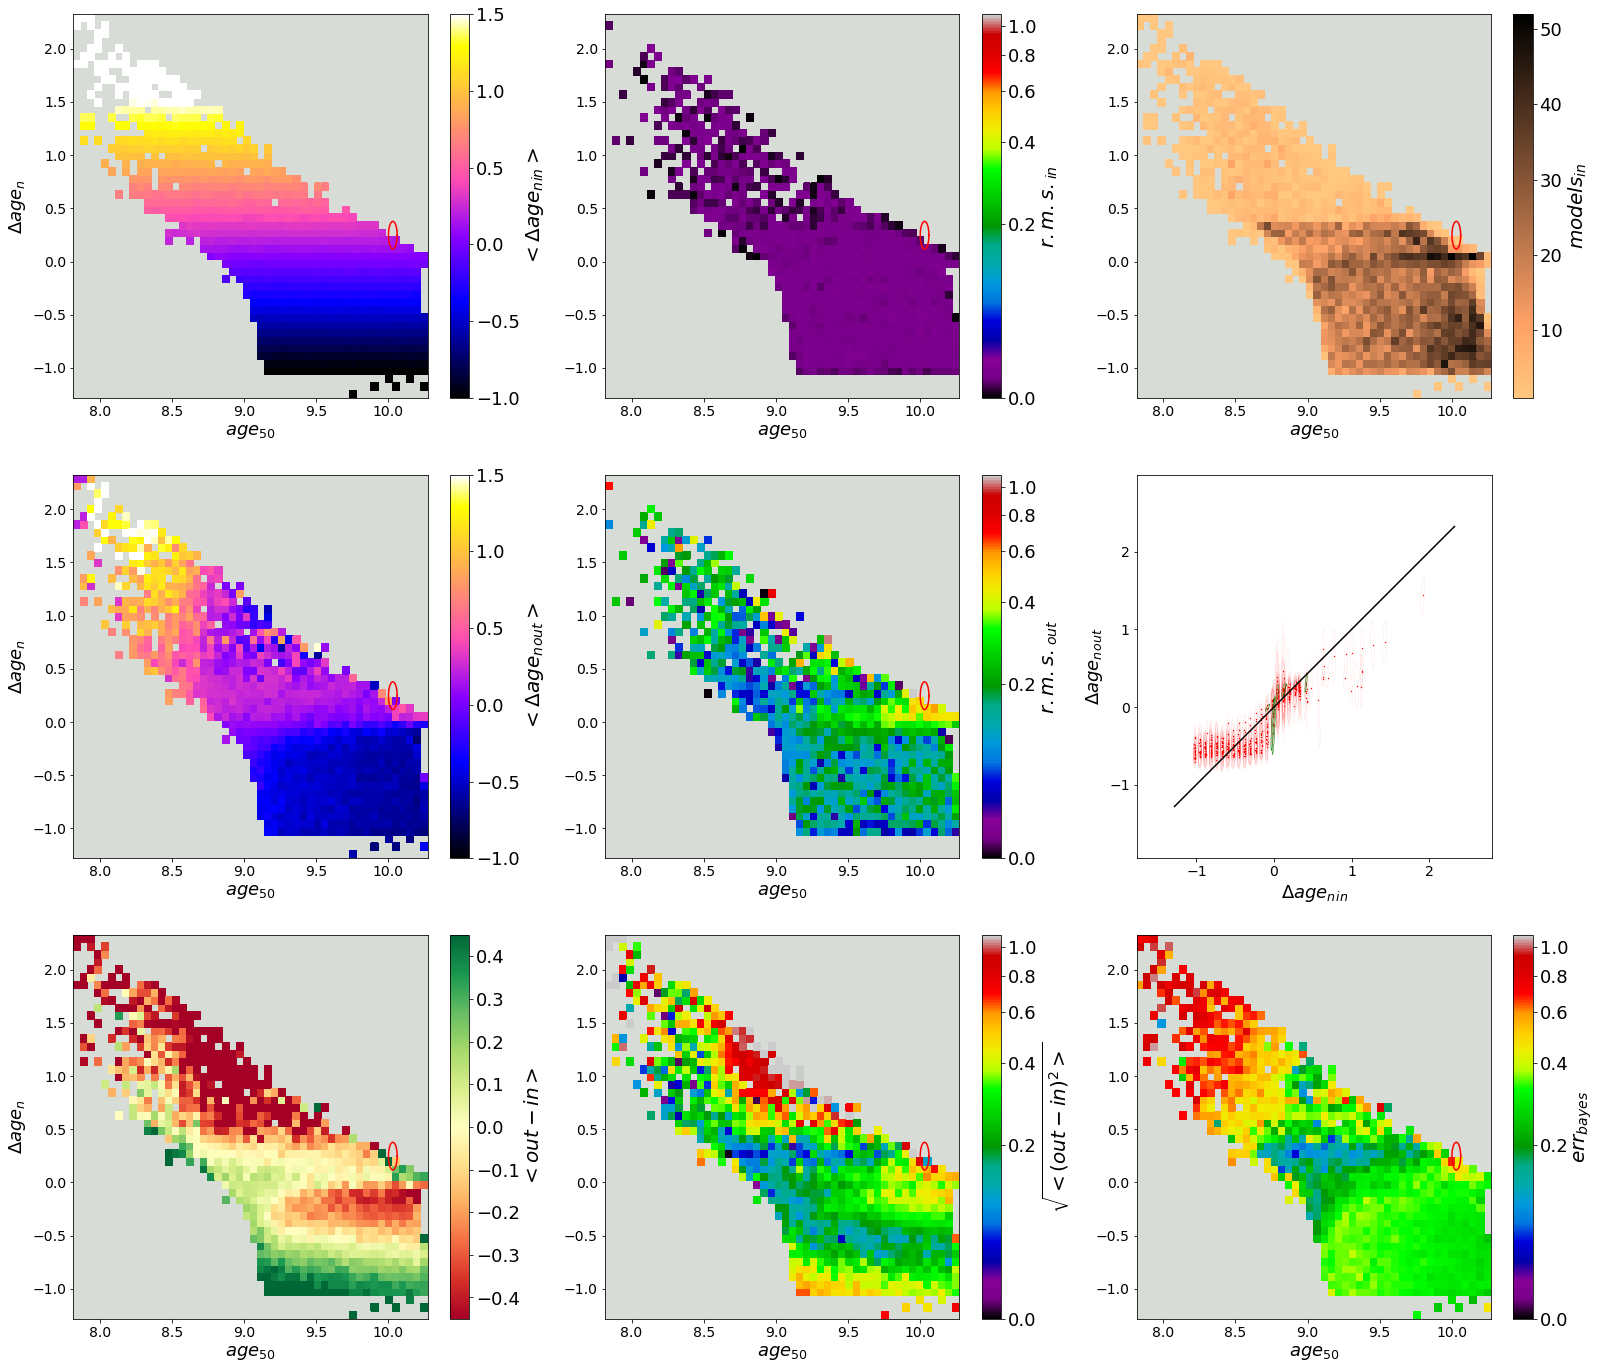

In [45]:
f_1090n50_physpar=f_plt.density_map_5p(np.log10(age50), np.log10(dage1090n50), np.log10(dage1090n50), np.log10(dage1090n50_mock), (dage1090n50_err),D4000n_err, hdhg_err,par_name=r'$\Delta age_{n}$', x_label=r'$age_{50}$', y_label=r'$\Delta age_{n}$', vmin=[-1.0,0.0, -0.45, 0.0,0.0], vmax=[1.5,1.1, 0.45, 1.1,1.1], figsize=(27,24), s=1)

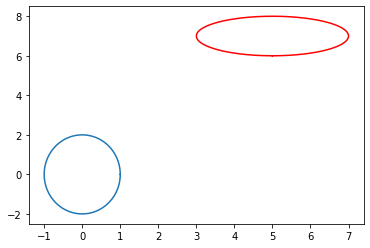

In [19]:
theta=np.arange(0, 2*np.pi, 0.01)
a=1
b=2
xpos=a*np.cos(theta)
ypos=b*np.sin(theta)

newx=xpos*np.cos(np.pi/2)+ypos*np.sin(np.pi/2)+5.0
newy=-xpos*np.sin(np.pi/2)+ypos*np.cos(np.pi/2)+7.0

plt.plot(xpos, ypos)
plt.plot(newx, newy, color='red')


In [20]:
cov=np.cov(np.log10(dage1090n50), np.log10(dage1090n50_mock))

In [21]:
np.linalg.eigvals(cov)

array([0.45960775, 0.04816463])

In [22]:
eig_val, eig_vec=np.linalg.eig(cov)

In [23]:
eig_val

array([0.45960775, 0.04816463])

In [24]:
v0=eig_vec[:,0]
v1=eig_vec[:,1]

In [25]:
v0

array([0.77650467, 0.6301115 ])

In [26]:
v1

array([-0.6301115 ,  0.77650467])

In [27]:
phi=np.arctan(v0[1]/v0[0])

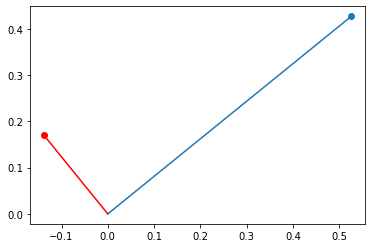

In [28]:
#v0=v0*np.sqrt(eig_val[0])
#v1=v1*np.sqrt(eig_val[1])
#plt.plot([0.0,v0[0]], [0.0, v0[1]])
#plt.plot([0.0,v1[0]], [0.0, v1[1]], color='red')
plt.axis('equal')

plt.scatter(np.sqrt(eig_val[0])*np.cos(phi), np.sqrt(eig_val[0])*np.sin(phi))
plt.scatter(-np.sqrt(eig_val[1])*np.sin(phi), np.sqrt(eig_val[1])*np.cos(phi), color='red')

plt.plot([0.0, np.sqrt(eig_val[0])*np.cos(phi)], [0.0, np.sqrt(eig_val[0])*np.sin(phi)])
plt.plot([0.0, -np.sqrt(eig_val[1])*np.sin(phi)], [0.0, np.sqrt(eig_val[1])*np.cos(phi)], color='red')

In [29]:
v0

array([0.77650467, 0.6301115 ])

In [30]:
v1

array([-0.6301115 ,  0.77650467])

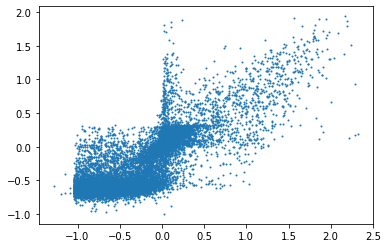

In [31]:
plt.scatter(np.log10(dage1090n50), np.log10(dage1090n50_mock), s=1)
#f_plt.ellipse(np.sqrt(eig_val[0]),np.sqrt(eig_val[1]), -phi, x_c=np.mean(np.log10(dage1090n50)), y_c=np.mean(np.log10(dage1090n50_mock)))


In [32]:
s_in=stats.binned_statistic(np.log10(dage1090n50),np.log10(dage1090n50), statistic='mean', bins=20)
s_out=stats.binned_statistic(np.log10(dage1090n50),np.log10(dage1090n50_mock), statistic='mean', bins=20)

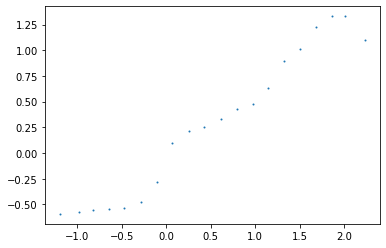

In [33]:
plt.scatter(s_in.statistic, s_out.statistic, s=1)

In [34]:
if save:
    f_ager.savefig('/home/edoardo/Desktop/TESI/figure/mock_ager_snr'+snr+'_9balmer.png')
    f_Zr.savefig('/home/edoardo/Desktop/TESI/figure/mock_Zr_snr'+snr+'_ellisse.png')
    f_age50.savefig('/home/edoardo/Desktop/TESI/figure/mock_age50_snr'+snr+'_9balmer.png')
    f_1090n50.savefig('/home/edoardo/Desktop/TESI/figure/mock_d1090n50_new_snr'+snr+'_9balmer.png')
    scat_hist_d1090n50.savefig('/home/edoardo/Desktop/TESI/figure/scat_hist_d1090n50_new_snr'+snr+'.png')
    f_1090n50_physpar.savefig('/home/edoardo/Desktop/TESI/figure/mock_d1090n50_new_physpar_snr'+snr+'.png')